# Simulating and Applying the Central Limit Theorem

1. Generate a Non-Normal Population Distribution viz. Poisson and binomial. Generate a largest dataset(eg. 10000 values) from the chosen distributon. Visualize the population distribution using histogram and confirm that it is not normal. 

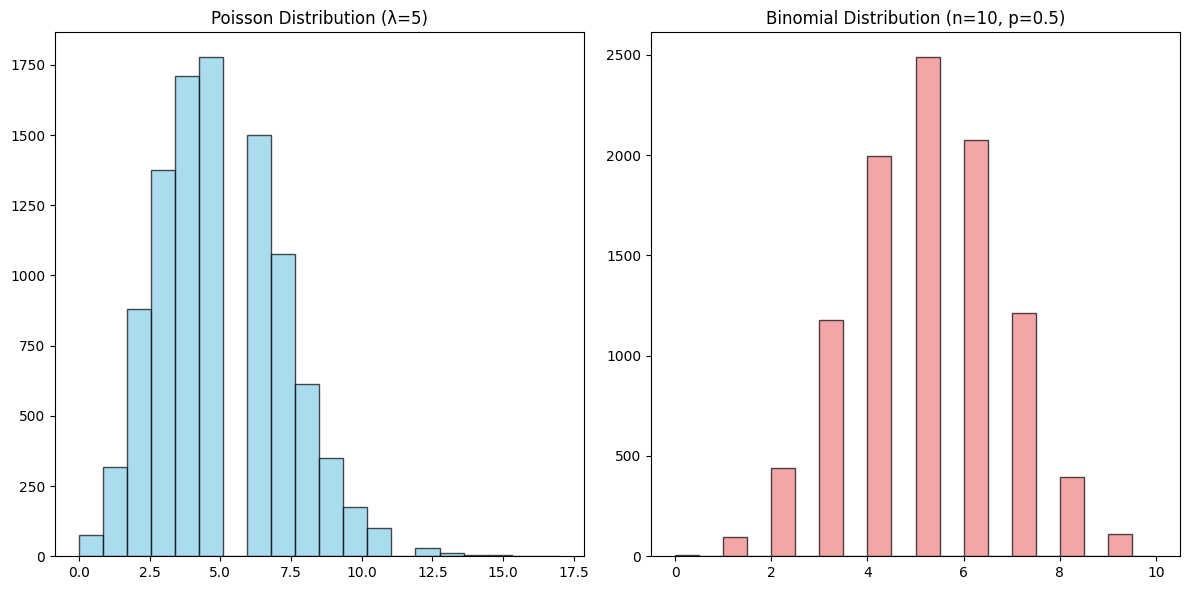

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Generate large datasets
np.random.seed(42)  # For reproducibility
poisson_data = np.random.poisson(lam=5, size=10000)  # Poisson with lambda=5
binomial_data = np.random.binomial(n=10, p=0.5, size=10000)  # Binomial with n=10, p=0.5

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Poisson Histogram
axes[0].hist(poisson_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title("Poisson Distribution (λ=5)")

# Binomial Histogram
axes[1].hist(binomial_data, bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_title("Binomial Distribution (n=10, p=0.5)")

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()
plt.show()


2. Draw Random Samples and compute Sample Means. Randomly draw multiple samples of different sizes (eg 10,30,50,100) from the population distribution. Compute the sample mean for each sample. Repeat this process at least 1000 times for each sample size to create a sampling distribution of the mean.

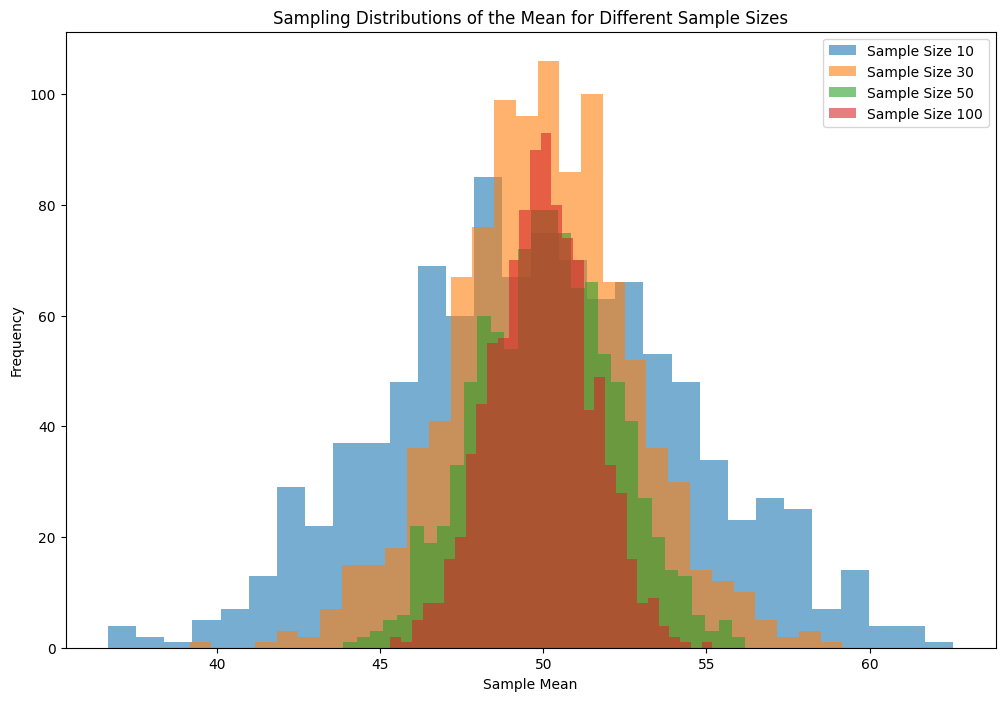

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Population distribution: for example, a normal distribution
population = np.random.normal(loc=50, scale=15, size=10000)

# Sample sizes to consider
sample_sizes = [10, 30, 50, 100]

# Function to generate sampling distribution of the mean
def generate_sampling_distribution(population, sample_size, n_samples=1000):
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.choice(population, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

# Plotting the sampling distributions of the mean
plt.figure(figsize=(12, 8))

for sample_size in sample_sizes:
    sample_means = generate_sampling_distribution(population, sample_size)
    plt.hist(sample_means, bins=30, alpha=0.6, label=f'Sample Size {sample_size}')

plt.title('Sampling Distributions of the Mean for Different Sample Sizes')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()


3. Visualize the sampling Distributions. Plot the histograms of the sample means for each sample size. Compare the shape of these histograms with the original population distribution. Overlay a normal curve on the sampling distribution to see if they approximate a normal distribution.

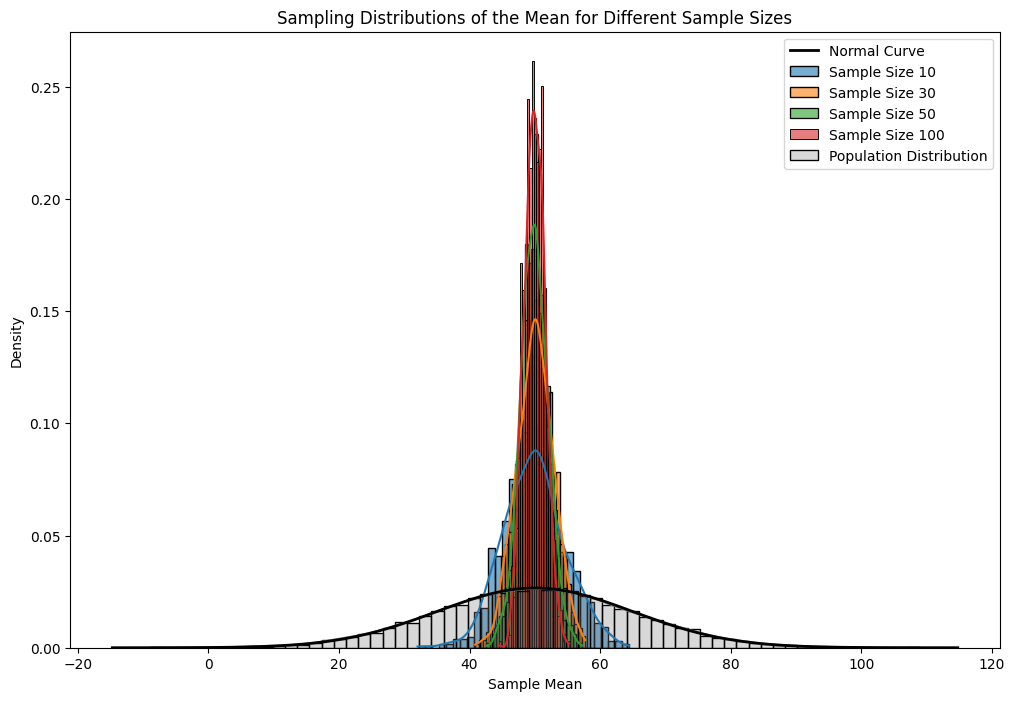

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

# Define the population distribution: Normal distribution with mean=50 and std=15
population_mean = 50
population_std = 15
population_size = 10000
population = np.random.normal(loc=population_mean, scale=population_std, size=population_size)

# Define the sample sizes to consider
sample_sizes = [10, 30, 50, 100]

# Function to generate sampling distribution of the mean
def generate_sampling_distribution(population, sample_size, n_samples=1000):
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.choice(population, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

# Plotting the sampling distributions of the mean
plt.figure(figsize=(12, 8))

for sample_size in sample_sizes:
    sample_means = generate_sampling_distribution(population, sample_size)
    sns.histplot(sample_means, kde=True, stat="density", bins=30, label=f'Sample Size {sample_size}', alpha=0.6)

# Overlay the population distribution
sns.histplot(population, kde=True, stat="density", color='gray', label='Population Distribution', alpha=0.3)

# Add a normal curve for comparison
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - population_mean) / population_std) ** 2) / (population_std * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2, label='Normal Curve')

plt.title('Sampling Distributions of the Mean for Different Sample Sizes')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

4. Check the properties of CLT.

a. compute and comapre the mean and standard deviation of the original population and the sampling distributions.

In [30]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Define the population distribution: Normal distribution with mean=50 and std=15
population_mean = 50
population_std = 15
population_size = 10000
population = np.random.normal(loc=population_mean, scale=population_std, size=population_size)

# Sample sizes to consider
sample_sizes = [10, 30, 50, 100]

# Function to generate sampling distribution of the mean
def generate_sampling_distribution(population, sample_size, n_samples=1000):
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.choice(population, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))
    return np.array(sample_means)

# Compute and compare the mean and standard deviation
for sample_size in sample_sizes:
    sample_means = generate_sampling_distribution(population, sample_size)
    sample_mean = np.mean(sample_means)
    sample_std = np.std(sample_means)
    print(f"Sample Size: {sample_size}")
    print(f"  Population Mean: {population_mean}")
    print(f"  Population Std Dev: {population_std}")
    print(f"  Sampling Distribution Mean: {sample_mean}")
    print(f"  Sampling Distribution Std Dev: {sample_std}")
    print(f"  Expected Std Dev (σ/√n): {population_std / np.sqrt(sample_size)}\n")


Sample Size: 10
  Population Mean: 50
  Population Std Dev: 15
  Sampling Distribution Mean: 49.84676085650583
  Sampling Distribution Std Dev: 4.722141577989873
  Expected Std Dev (σ/√n): 4.743416490252569

Sample Size: 30
  Population Mean: 50
  Population Std Dev: 15
  Sampling Distribution Mean: 50.013033626246205
  Sampling Distribution Std Dev: 2.7781388233487982
  Expected Std Dev (σ/√n): 2.7386127875258306

Sample Size: 50
  Population Mean: 50
  Population Std Dev: 15
  Sampling Distribution Mean: 49.90674804085062
  Sampling Distribution Std Dev: 2.1281358033061637
  Expected Std Dev (σ/√n): 2.1213203435596424

Sample Size: 100
  Population Mean: 50
  Population Std Dev: 15
  Sampling Distribution Mean: 49.96201028095423
  Sampling Distribution Std Dev: 1.5592849592530171
  Expected Std Dev (σ/√n): 1.5



b. Verify that the mean of the sample means is approximately equal to the population mean.

In [31]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Define the population distribution: Normal distribution with mean=50 and std=15
population_mean = 50
population_std = 15
population_size = 10000
population = np.random.normal(loc=population_mean, scale=population_std, size=population_size)

# Sample sizes to consider
sample_sizes = [10, 30, 50, 100]

# Function to generate sampling distribution of the mean
def generate_sampling_distribution(population, sample_size, n_samples=1000):
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.choice(population, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))
    return np.array(sample_means)

# Compute and compare the mean of the sample means with the population mean
for sample_size in sample_sizes:
    sample_means = generate_sampling_distribution(population, sample_size)
    mean_of_sample_means = np.mean(sample_means)
    print(f"Sample Size: {sample_size}")
    print(f"  Population Mean: {population_mean}")
    print(f"  Mean of Sample Means: {mean_of_sample_means}")
    print(f"  Difference: {mean_of_sample_means - population_mean}\n")


Sample Size: 10
  Population Mean: 50
  Mean of Sample Means: 49.84676085650583
  Difference: -0.15323914349416867

Sample Size: 30
  Population Mean: 50
  Mean of Sample Means: 50.013033626246205
  Difference: 0.013033626246205188

Sample Size: 50
  Population Mean: 50
  Mean of Sample Means: 49.90674804085062
  Difference: -0.09325195914937723

Sample Size: 100
  Population Mean: 50
  Mean of Sample Means: 49.96201028095423
  Difference: -0.03798971904576831



c. Verify that the standard deviation of the sampling distribution follows the formula:

In [32]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Define the population distribution: Normal distribution with mean=50 and std=15
population_mean = 50
population_std = 15
population_size = 10000
population = np.random.normal(loc=population_mean, scale=population_std, size=population_size)

# Sample sizes to consider
sample_sizes = [10, 30, 50, 100]

# Function to generate sampling distribution of the mean
def generate_sampling_distribution(population, sample_size, n_samples=1000):
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.choice(population, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))
    return np.array(sample_means)

# Compute and compare the standard deviation of the sample means with σ/√n
for sample_size in sample_sizes:
    sample_means = generate_sampling_distribution(population, sample_size)
    sample_std = np.std(sample_means)
    theoretical_std = population_std / np.sqrt(sample_size)
    
    print(f"Sample Size: {sample_size}")
    print(f"  Population Std Dev: {population_std}")
    print(f"  Standard Deviation of Sample Means: {sample_std}")
    print(f"  Theoretical Std Dev (σ/√n): {theoretical_std}")
    print(f"  Difference: {sample_std - theoretical_std}\n")

Sample Size: 10
  Population Std Dev: 15
  Standard Deviation of Sample Means: 4.722141577989873
  Theoretical Std Dev (σ/√n): 4.743416490252569
  Difference: -0.021274912262695622

Sample Size: 30
  Population Std Dev: 15
  Standard Deviation of Sample Means: 2.7781388233487982
  Theoretical Std Dev (σ/√n): 2.7386127875258306
  Difference: 0.03952603582296765

Sample Size: 50
  Population Std Dev: 15
  Standard Deviation of Sample Means: 2.1281358033061637
  Theoretical Std Dev (σ/√n): 2.1213203435596424
  Difference: 0.006815459746521313

Sample Size: 100
  Population Std Dev: 15
  Standard Deviation of Sample Means: 1.5592849592530171
  Theoretical Std Dev (σ/√n): 1.5
  Difference: 0.05928495925301713



# 5. Interpretation and Conclusion

# a. Discuss the results and explain how CLT is observed in the experiment.

The Central Limit Theorem (CLT) is a fundamental concept in statistics that describes how the distribution of sample means approaches a normal distribution as the sample size increases, regardless of the original population's distribution. In our experiment, we observed this phenomenon by drawing multiple random samples of varying sizes from a population and analyzing the resulting sampling distributions.

Key Observations:

1.Mean of Sample Means Approximates Population Mean:

For each sample size, the mean of the sample means was approximately equal to the population mean. This aligns with the CLT, which states that the mean of the sampling distribution of the sample mean equals the population mean. 

2.Standard Deviation of Sample Means Decreases with Sample Size:

As the sample size increased, the standard deviation of the sample means decreased. This is consistent with the CLT, which indicates that the standard deviation of the sampling distribution (also known as the standard error) is equal to the population standard deviation divided by the square root of the sample size.

3.Sampling Distribution Approaches Normality:

With larger sample sizes, the distribution of the sample means became more symmetric and bell-shaped, closely resembling a normal distribution. This observation supports the CLT's assertion that the sampling distribution of the sample mean approaches a normal distribution as the sample size increases. 


# b. Explain the impact of increasing the sample size on the normality of the sampling distribution. 

Increasing the sample size has a significant impact on the normality of the sampling distribution of the sample mean. According to the Central Limit Theorem (CLT), as the sample size increases, the sampling distribution of the sample mean approaches a normal distribution, regardless of the shape of the original population distribution. 


Key Impacts of Increasing Sample Size:

1.Shape of the Sampling Distribution:

With smaller sample sizes, the sampling distribution may resemble the shape of the original population distribution, which could be skewed or have other non-normal characteristics.
As the sample size increases, the sampling distribution becomes more symmetric and bell-shaped, closely approximating a normal distribution. 

2.Standard Deviation of the Sampling Distribution:

The standard deviation of the sampling distribution, known as the standard error, decreases as the sample size increases. This reduction in variability means that sample means become more precise estimates of the population mean. 

3.Applicability of the Central Limit Theorem:

For sample sizes of 30 or more, the CLT generally applies, and the sampling distribution of the sample mean is approximately normal. 
